
# 5. 3 The Gram–Schmidt Process

In the previous sections we saw the importance of working with an orthogonal and orthonormal bases. In this section, we explore _the Gram–Schmidt process_ which is a simple algorithm to construct an orthogonal or orthonormal basis from any nonzero subspace of $\mathbb{R}^n$.

## Idea: construction of an orthogonal basis form a basis with two elements 

To see the idea behind the Gram–Schmidt process let's review Example 2 in Section 5.2:

Suppose $\vec{y} = \begin{bmatrix} 7 \\ 6 \end{bmatrix}$ and $\vec{u} = \begin{bmatrix} 4 \\ 2 \end{bmatrix}$. $\vec{y}$ and $\vec{u}$ are linearly independent and form a basis for $\mathbb{R}^2$. Clearly, as shown in below figure, $\vec{y}$ and $\vec{u}$ are not orthogonal, however $\vec{y}$ and $\vec{z}$ (the component of $\vec{y}$ orthogonal to $\vec{u}$) form an orthogonal basis for $\mathbb{R}^2$

The projection of y onto u is  [8. 4.]
The component of y orthogonal to u is [-1.  2.]


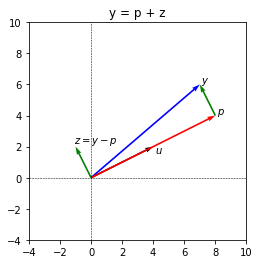

In [1]:
import numpy as np
# setup vectors

y = np.array([7,6])

u = np.array([4,2])

# projection of y onto u

proj_y_u = (np.dot(y,u)/ np.dot(u,u))* u
print( "The projection of y onto u is ", proj_y_u) 

z = y - proj_y_u

print("The component of y orthogonal to u is", z )


# Plot the coordinates in two separate plots
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

figsize=(10, 5)

# vector y
ax.quiver(0, 0, 7, 6, angles='xy', scale_units='xy', scale=1, color='blue', label ='y')
ax.text(7.1,6.1,'$y$')

# vector u
ax.quiver(0, 0, 4, 2, angles='xy', scale_units='xy', scale=1, color='black')
ax.text(4.1,1.6,'$u$')

# orthogonal projection p
ax.quiver(0, 0, 8, 4, angles='xy', scale_units='xy', scale=1, color='red')
ax.text(8.1,4.1,'$p$')

# vector z
ax.quiver(0, 0, -1, 2, angles='xy', scale_units='xy', scale=1, color='green')
ax.text(-1.1,2.2,'$z = y - p$')

# A copy of vector z starting at the end of vector p
ax.quiver(8, 4, -1, 2, angles='xy', scale_units='xy', scale=1, color='green')



ax.set_xlim([-4, 10])
ax.set_ylim([-4, 10])
ax.set_aspect('equal')
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

ax.set_title('y = p + z')


#plt.tight_layout()
plt.show()


Therefore, we have converted a basis for $\mathbb{R}^2$ into an orthogonal basis for $\mathbb{R}^2$.

### Construction of an orthogonalll basis form a basis with three elements 

__Example 2:__

Let $\vec{x}_1 = \begin{bmatrix} 1 \\ 1 \\ 1\\ 1 \end{bmatrix}$, $\vec{x}_2 = \begin{bmatrix} 0 \\ 1 \\ 1\\ 1 \end{bmatrix}$, $\vec{x}_3 = \begin{bmatrix} 0 \\ 0 \\ 1\\ 1 \end{bmatrix}$, and $W = \text{span}(\{\vec{x}_1, \vec{x}_2, \vec{x}_3\})$. We want to construct an orthogonal basis for $W$.

__Solution:__

The set $\{\vec{x}_1, \vec{x}_2, \vec{x}_3\}$ is a linearly independent and forms a basis for $W$. We will construct an orthogonal set of vectors $\{\vec{v}_1, \vec{v}_2, \vec{v}_3\}$ such that $W = \text{span}(\{\vec{v}_1, \vec{v}_2, \vec{v}_3\})$.

__Step 1:__ 

Define $\vec{v}_1 := \vec{x}_1$ and $W_1 := \text{span}(\vec{v}_1)$.

__Step 2:__ We seek a vector $\vec{v_2}$ orthogonal to $\vec{v_1}$. Project $\vec{x}_2$ onto $W_1$; the component of $\vec{x}_2$ orthogonal to the subspace $W_1$ has the desired property:

$$\vec{v}_2 = \vec{x}_2 - \text{proj}_{W_1}^{\vec{x}_2}\quad \implies \vec{v_2} \quad \perp \vec{v_1}$$

Now, let $W_2 = \text{span}(\vec{v}_1, \vec{v}_2)$.

In [2]:
# setup vectors

x1 = np.array([1,1,1,1])

x2 = np.array([0,1,1,1])

x3 = np.array([0,0,1,1])

v1 = x1
# projection of x2 onto x1

proj_x2_v1 = (np.dot(x2,v1)/ np.dot(v1,v1))* v1
print( "The projection of x2 onto x1 is ", proj_x2_v1, '\n') 

v2 = x2 - proj_x2_v1

print("The component of x1 orthogonal to W1 is", v2 )


The projection of x2 onto x1 is  [0.75 0.75 0.75 0.75] 

The component of x1 orthogonal to W1 is [-0.75  0.25  0.25  0.25]


__Step 3:__

We can use a similar approach to construct $\vec{v}_3$. We find the orthogonal projection of $\vec{x}_3$ onto $W_2$ and define $\vec{v}_3$ as the component of $\vec{x}_3$ that is orthogonal to the subspace $W_2$:

$$
\vec{v}_3 = \vec{x}_3 - \text{proj}_{W_2}(\vec{x}_3)
$$

Since both $\vec{x}_3$ and $\text{proj}_{W_2}(\vec{x}_3)$ are elements of $W$, $\vec{v}_3$ is also in $W$. Moreover, by definition, $\vec{v}_3$ is orthogonal to both $\vec{v}_1$ and $\vec{v}_2$. Thus, $\{\vec{v}_1, \vec{v}_2, \vec{v}_3\}$ forms an orthogonal basis for $W$.

In [3]:
# projection of x3 onto W2

proj_x3_W2 = (np.dot(x3,v1)/ np.dot(v1,v1))* v1  +  (np.dot(x3,v2)/ np.dot(v2,v2))* v2

print( "the projection of x3 onto W2 is ", proj_x3_W2, '\n') 

# component of y orthogonal to p
v3 = x3 - proj_x3_W2

print("the component of x3 orthogonal to W2 is", v3 )

the projection of x3 onto W2 is  [0.         0.66666667 0.66666667 0.66666667] 

the component of x3 orthogonal to W2 is [ 0.         -0.66666667  0.33333333  0.33333333]



__Step 4 (Optional)__  

Normalizing the basis elements $\vec{v_1}$, $\vec{v_2}$, and $\vec{v_3}$, we will get unit vectors $\vec{e_1}$, $\vec{e_2}$, and $\vec{e_3}$ respectievely. $\{\vec{e_1}, \vec{e_2}, \vec{e_3}\}$ is an orthonormal basis for $W$.

In [4]:
# The unit vector of v1
e1 = v1 / np.sqrt(np.dot(v1,v1))

# The unit vector of v1
e2 = v2 / np.sqrt(np.dot(v2,v2))

# The unit vector of v1
e3 = v3 / np.sqrt(np.dot(v3,v3))

print("e1 = ", e1)
print("e2 = ", e2)
print("e3 = ", e3)

e1 =  [0.5 0.5 0.5 0.5]
e2 =  [-0.8660254   0.28867513  0.28867513  0.28867513]
e3 =  [ 0.         -0.81649658  0.40824829  0.40824829]


## The Gram_Schmidt Process

__Theorem 1__ (the Gram-Schmidt algorithm)

Let $W \subset \mathbb{R}^n$ be a non-zero subspace, and $\{\vec{x_1}, \vec{x_2}, \dots, \vec{x_p}\}$ be a basis for $W$. Define:

\begin{align}
\vec{v_1} &= \vec{x_1} \quad \text{and} \quad W_1 = \text{span}(\vec{v_1}),\\
\vec{v_2} &= \vec{x_2} - \text{proj}_{W_1}(\vec{x_2}) \quad \text{and} \quad W_2 = \text{span}(\{\vec{v_1}, \vec{v_2}\}),\\
& \vdots \\
\vec{v_p} &= \vec{x_p} - \text{proj}_{W_{p-1}}(\vec{x_p}) \quad \text{and} \quad W_p = \text{span}(\{\vec{v_1}, \vec{v_2}, \dots, \vec{v_3}\}).
\end{align}

Then $W = W_p$, and $\{\vec{v_1}, \vec{v_2}, \dots, \vec{v_p}\}$ is an orthogonal basis for $W$. Moreover, if $\vec{e_1}, \vec{e_2}, \dots, \vec{e_p}$ are the unit vectors of $\vec{v_1}, \vec{v_2}, \dots, \vec{v_p}$ respectively, then $\{\vec{e_1}, \vec{e_2}, \dots, \vec{e_p}\}$ is an orthonormal basis for $W$.

## Application: the QR Factorization

Let $A$ be an $m \times n$ matrix whose columns form a linearly independent set. Applying the Gram-Schmidt process (with normalizations) to the column space of $A$ results in a factorization of $A$ called the QR-factorization. The QR-factorization is commonly used in computer algorithms for solving equations and finding eigenvalues.

__Theorem 2:__

Suppose $A$ is an $m \times n$ matrix with linearly independent columns. Then $A$ can be factored as $QR$, where $Q$ is an $m \times n$ matrix whose columns form an orthonormal basis for $Col(A)$, and $R$ is an $n \times n$ upper triangular invertible matrix with positive entries on its diagonal.

To construct the matrix $Q$, we use the Gram-Schmidt process to find an orthonormal basis for $Col(A)$. Then, the columns of $Q$ are the basis elements. To compute $R$, note that $Q$ is an _orthogonal matrix_ ($Q^TQ = I$); therefore $Q^{-1} = Q^T$, and $R = Q^TA$.

__Example 3:__

Suppose $A$ is a $3 \times 3$ matrix whose columns are $\vec{x_1}, \vec{x_2}, \vec{x_3}$ given in Example 2. Find a $QR$-factorization for $A$.

__Solution:__

An orthogonal basis for $\text{Col } A$ was found in Example 2: $\{ \vec{e_1}, \vec{e_2}, \vec{e_3}\}$. Thus,

$$
Q = [\ \vec{e_1}, \vec{e_2}, \vec{e_3}\ ]
$$

The following cell computes $R$.

In [5]:
# setup A
A = np.transpose([x1, x2, x3])

# setup Q
Q = np.transpose([e1, e2, e3])

# Compute R= Q^T*A
R = np.transpose(Q) @ A

In [6]:
R

array([[2.00000000e+00, 1.50000000e+00, 1.00000000e+00],
       [1.11022302e-16, 8.66025404e-01, 5.77350269e-01],
       [1.11022302e-16, 1.11022302e-16, 8.16496581e-01]])

Note that elements below the diagonal in $R$ are very small and close to zero. In fact, $R$ should be an upper triangular matrix. The reason why Python won't display the exact decimal numbers we expect is that some decimal fractions cannot be represented exactly as binary fractions. To address this issue, we can set very small elements of $R$ to zero.

In [7]:
eps = 0.000001 
R[np.abs(R) < eps] = 0
R

array([[2.        , 1.5       , 1.        ],
       [0.        , 0.8660254 , 0.57735027],
       [0.        , 0.        , 0.81649658]])

__Numerical Note__ 

When the Gram–Schmidt process is run on a computer, round off error can build up as the vectors $\vec{v_k}$ are calculated, one by one. Specifically, for large and unequal values of $k$ and $j$, the dot products $\vec{v_k}^T \cdot \vec{u_j}$ may not be sufficiently close to zero, leading to a loss of orthogonality. This loss of orthogonality can be reduced substantially by rearranging the order of the calculations. 


We can also utilize `numpy.linalg.qr` in Python to compute the QR factorization of a matrix. This function provides an efficient and accurate implementation of the Gram-Schmidt process avoiding unnecessary loss of orthogonality. 

In [8]:
Q, R = np.linalg.qr(A)

print('Q = \n', Q, '\n\n')

print('R = \n', R)

Q = 
 [[-0.5         0.8660254   0.        ]
 [-0.5        -0.28867513  0.81649658]
 [-0.5        -0.28867513 -0.40824829]
 [-0.5        -0.28867513 -0.40824829]] 


R = 
 [[-2.         -1.5        -1.        ]
 [ 0.         -0.8660254  -0.57735027]
 [ 0.          0.         -0.81649658]]


## Exercises

1. Let $\vec{x}_1 = \begin{bmatrix} 3 \\ 1 \\ -1\\ 3 \end{bmatrix}$, $\vec{x}_2 = \begin{bmatrix} -5 \\ 1 \\ 5\\ -7 \end{bmatrix}$, $\vec{x}_3 = \begin{bmatrix} 1\\ 1 \\ -2\\ 8 \end{bmatrix}$, and $W = \text{span}(\{\vec{x}_1, \vec{x}_2, \vec{x}_3\})$. Construct an orthonormal basis for $W$.


2. Let $A$ be a matrix whose columns are $\vec{x}_1$, $\vec{x}_2$, $\vec{x}_3$ from Exercise 1: $A = \begin{bmatrix} 3 & -5 & 1 \\  1 & 1 & 1 \\ -1 & 5 & -2 \\ 3 & -7 & 8\end{bmatrix}$. Find a QR decomposition for $A$.


3. Let $A = QR$, where $Q$ is an $m \times n$ matrix with orthogonal columns, and $R$ is an $n \times n$ matrix. Show that if the columns of $A$ are linearly dependent, then $R$ cannot be invertible.
